In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

data_json = json.load(open('kode_negara_lengkap.json'))
data_csv = pd.read_csv("produksi_minyak_mentah.csv")

In [4]:
list_nama_negara = []
list_kode_negara = []
dict_region = {}
dict_sub_region = {}

jenis_unik = list(data_csv['kode_negara'].unique())
for i in range(len(jenis_unik)):
    for j in data_json:
        if j["alpha-3"]==jenis_unik[i]:
            if jenis_unik[i] not in list_kode_negara:
                list_kode_negara.append(jenis_unik[i])
            if j["name"] not in list_nama_negara:
                list_nama_negara.append(j["name"])
            dict_region[jenis_unik[i]] = j["region"]
            dict_sub_region[jenis_unik[i]] = j["sub-region"]

In [5]:
data_csv["nama_negara"] = ""
data_csv["region"] = ""
data_csv["sub-region"] = ""

for i in range(len(data_csv["kode_negara"])):
    for j in range(len(list_kode_negara)):
        if data_csv["kode_negara"][i] == list_kode_negara[j]:
            data_csv["nama_negara"][i] = list_nama_negara[j]
            data_csv["region"][i] = dict_region[list_kode_negara[j]]
            data_csv["sub-region"][i] = dict_sub_region[list_kode_negara[j]]

data_csv["nama_negara"].replace('', np.nan, inplace=True)
data_csv.dropna(subset=["nama_negara"], inplace=True)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_6208/2452163107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv["nama_negara"][i] = list_nama_negara[j]
C:\Users\lenovo\AppData\Local\Temp/ipykernel_6208/2452163107.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv["region"][i] = dict_region[list_kode_negara[j]]
C:\Users\lenovo\AppData\Local\Temp/ipykernel_6208/2452163107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [7]:
negara_total_produksi_0 = []
for i in range(len(list_nama_negara)):
    total = data_csv[data_csv["nama_negara"] == list_nama_negara[i]]["produksi"].sum()
    if total == 0:
        if list_nama_negara[i] not in negara_total_produksi_0:
            negara_total_produksi_0.append(list_nama_negara[i])

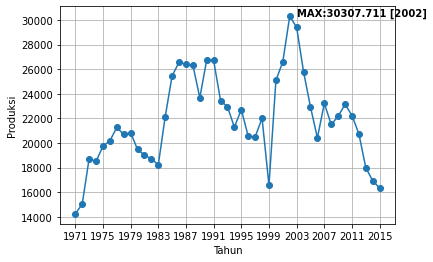

In [9]:
negara = "Australia"
x = np.array(data_csv[data_csv["nama_negara"]==negara]["tahun"])
y = np.array(data_csv[data_csv["nama_negara"]==negara]["produksi"])


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y,marker="o")

plt.grid()
plt.xlabel("Tahun")
plt.ylabel("Produksi")
plt.xticks(np.arange(min(x), max(x)+1, 4.0))

if negara not in negara_total_produksi_0:
        ymax = max(y)
        xpos = np.where(y == ymax)
        xmax = x[xpos]
        font = {'weight' : 'bold',
                'size'   : 10}
        ax.annotate('MAX:{} {}'.format(ymax,xmax), xy=(xmax, ymax), xytext=(xmax+1, ymax + 15),**font)
plt.show()

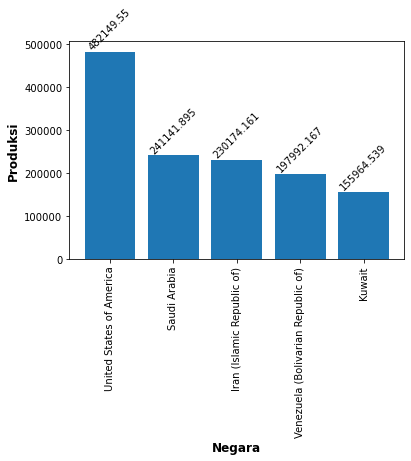

In [10]:
#(1b) B-besar negara dengan jumlah produksi terbesar pada tahun T
B = 5
T = 1971
data_urut_suatu_tahun = data_csv.loc[data_csv["tahun"] == T].sort_values("produksi",ascending=False).head(B)

x = np.array(data_urut_suatu_tahun["nama_negara"])
y = np.array(data_urut_suatu_tahun["produksi"])

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(x,y)
for i in range(len(y)):
    ax.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom',rotation=45)
plt.xticks(rotation=90)
plt.xlabel("Negara",weight="bold",size=12)
plt.ylabel("Produksi",weight="bold",size=12)
plt.show()


In [11]:
B = 10
T = 2015
data_urut_suatu_tahun = data_csv.loc[data_csv["tahun"] == T].sort_values("produksi",ascending=False).head(B)

x = np.array(data_urut_suatu_tahun["nama_negara"])
y = np.array(data_urut_suatu_tahun["produksi"])

df = pd.DataFrame(x,y)

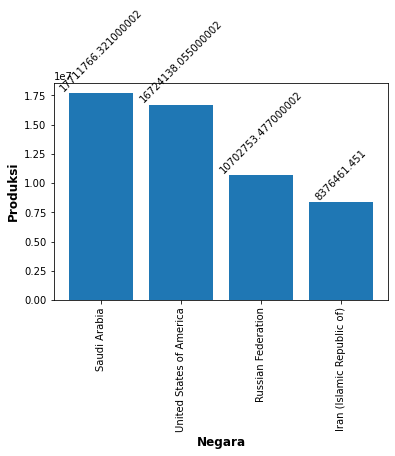

In [14]:
#1c
B = 4
total_produksi = []
for i in range(len(list_nama_negara)):
    total = data_csv[data_csv["nama_negara"] == list_nama_negara[i]]["produksi"].sum()
    total_produksi.append(total)

df = pd.DataFrame(list_nama_negara)
df.columns = ["nama_negara"]
df["total_produksi"] = ""

for i in range(len(df["nama_negara"])):
    for j in range(len(list_nama_negara)):
        if df["nama_negara"][i] == list_nama_negara[j]:
            df["total_produksi"][i] = total_produksi[j]
df_urut = df.sort_values("total_produksi", ascending=False)

x = np.array(df_urut["nama_negara"].head(B))
y = np.array(df_urut["total_produksi"].head(B))

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(x,y)
for i in range(len(y)):
    ax.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom',rotation=45)
plt.xticks(rotation=90)
plt.xlabel("Negara",weight="bold",size=12)
plt.ylabel("Produksi",weight="bold",size=12)
plt.show()


In [16]:
#(1d_123) negara penghasil produksi terbesar, terkecil, dan 0 pada tahun tertentu
tahun = 2002
data_seleksi1 = data_csv[(data_csv["tahun"] == tahun) & (data_csv["produksi"] > 0)]
data_seleksi2 = data_csv[(data_csv["tahun"] == tahun) & (data_csv["produksi"] == 0)]

datasort_max = data_seleksi1.sort_values("produksi", ascending=False)
datasort_min = data_seleksi1.sort_values("produksi", ascending=True)

print(datasort_max[:1],"\n")
print(datasort_min[:1],"\n")
print(data_seleksi2)

     kode_negara  tahun    produksi         nama_negara  region  \
3045         RUS   2002  366407.979  Russian Federation  Europe   

          sub-region  
3045  Eastern Europe   

     kode_negara  tahun  produksi nama_negara  region       sub-region
3161         SVN   2002     0.994    Slovenia  Europe  Southern Europe 

     kode_negara  tahun  produksi                              nama_negara  \
121          BEL   2002       0.0                                  Belgium   
301          FIN   2002       0.0                                  Finland   
526          ISL   2002       0.0                                  Iceland   
571          IRL   2002       0.0                                  Ireland   
706          KOR   2002       0.0                       Korea, Republic of   
751          LUX   2002       0.0                               Luxembourg   
1021         PRT   2002       0.0                                 Portugal   
1156         SWE   2002       0.0                

In [69]:
#(1d_4) negara dengan total produksi 0
total_produksi_0 = {}
for i in range(len(list_nama_negara)):
    total = data_csv[data_csv["nama_negara"] == list_nama_negara[i]]["produksi"].sum()
    if total == 0:
        total_produksi_0[list_nama_negara[i]] = list_kode_negara[i]

df = pd.DataFrame(list(total_produksi_0.items()))
df.columns = ["nama_negara","produksi"]

df["region"] = ""
df["sub-region"] = ""

for i in range(len(df["nama_negara"])):
    for j in range(len(list_nama_negara)):
        if df["nama_negara"][i] == list_nama_negara[j]:
            df["region"][i] = dict_region[list_kode_negara[j]]
            df["sub-region"][i] = dict_sub_region[list_kode_negara[j]]     